# Statistics for datascience
    by omar
   ### Data Types : 
                1- Discrete 
   
                2- Continuos 
                
                3- Categorical
                
                4- Binary
                
                5- Ordinal : Categorical data that has an explicit ordering.

Why do we bother with a taxonomy of data types? It turns out that for the
purposes of data analysis and predictive modeling, the data type is important to
help determine the type of visual display, data analysis, or statistical model. In
fact, data science software, such as R and Python, uses these data types to
improve computational performance. More important, the data type for a
variable determines how software will handle computations for that variable.


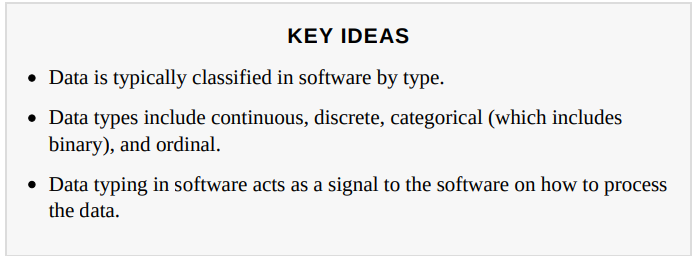

# Rectangular Data :
### DataFrame : Rectangular data (like a spreadsheet) is the basic data structure for statistical and machine learning models.
### Feature : A column in the table is commonly referred to as a feature.
# KEY IDEAS
###### The basic data structure in data science is a rectangular matrix in which
###### rows are records and columns are variables (features).
###### Terminology can be confusing; there are a variety of synonyms arising


# Data Exploration with the "Typical" values.
you often start with a huge data , so you just observe typical values for each feature.
Mean : sum/count
Weighted mean : (sum/count) * weight
Median : The value such that one-half of the data lies above and below
Weighted Median :The value such that one-half of the sum of the weights lies above and below the sorted data
Trimmed/truncated mean : The average of all values after dropping a fixed number of extreme values.
Robust : not sensitive to outliers.
outliers : extreme points in the data.

### Trimmed Mean : sort the data , then eliminate the first "n" values at the front and the rear

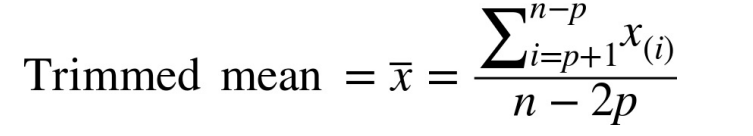



In [1]:
import pandas as pd
import numpy as np
my_data=pd.read_csv("data.csv")
continuos_col=my_data["texture_worst"]
sorted_column=continuos_col.sort_values()
trimmed=sorted_column[10:579] # dropping 10 values at the start and 10 values at the end
trimmed.mean()

25.88171735241502

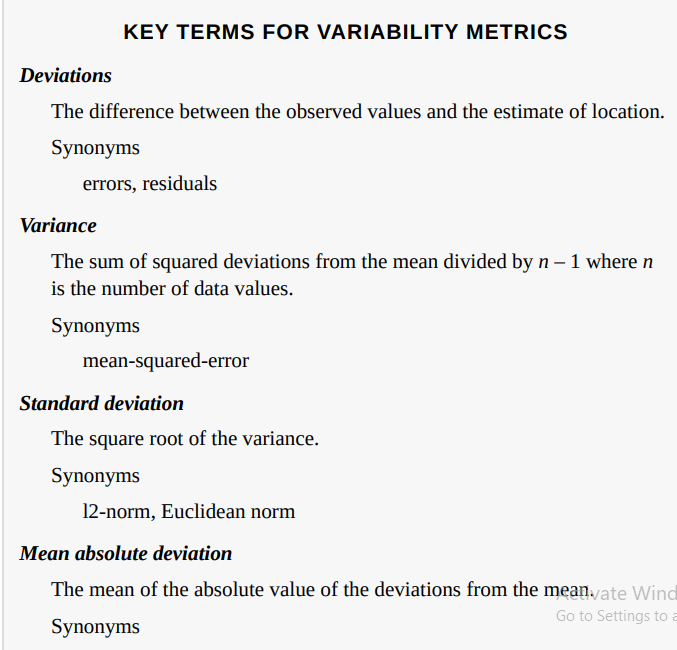
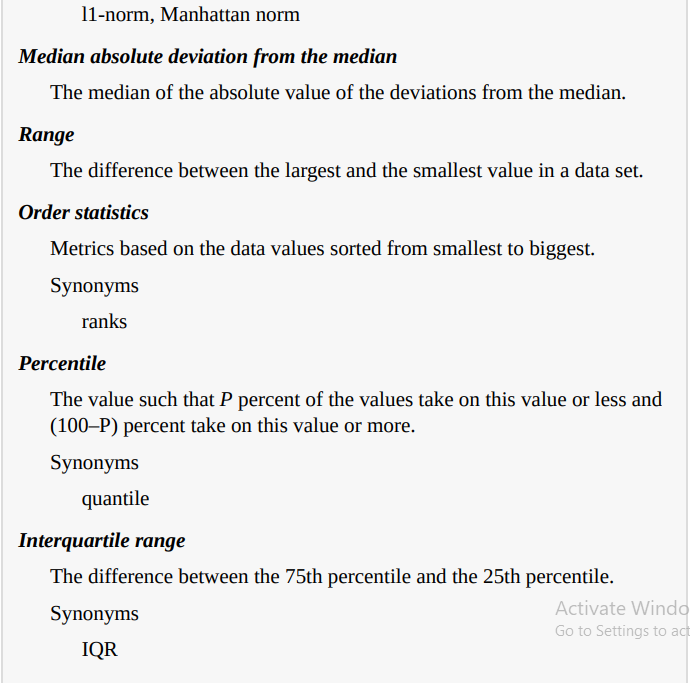


# Exploring the Data Distribution
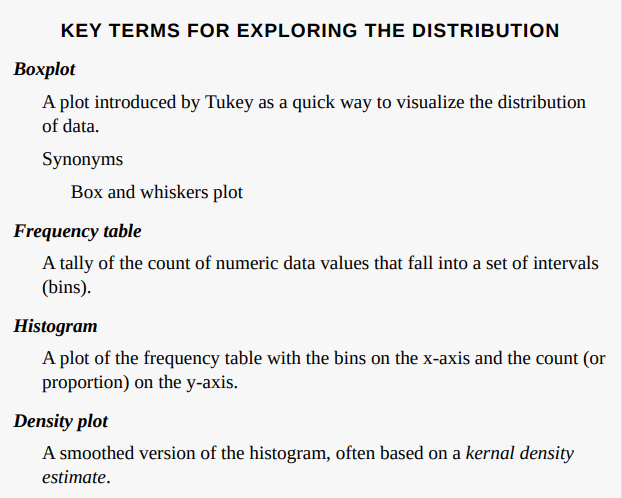

# BoxPlot
### What Can You Answer with boxplots?
1 - you get the min , max , Q1,Q3 , median at one graph

2 - You can answer Questions that invloves percent of the data , for example : 75% of the data is larger than 22 ? you can find that easily by looking above the Q1 , same for 25% lower which is under Q1 , and 75% lower which is under Q3 , and 25% max which is above Q3

3 - You get the IQR 

4 - When the box is compressed and the median isn't in the middle of the box , you know that there's repeating values and when the whiskers are long , means that theres many outliers.

5 - You can draw the box plot vs the distribution

6 - Box plots are at their best when a comparison in distributions needs to be performed between groups. They are compact in their summarization of data, and it is easy to compare groups through the box and whisker markings’ positions.
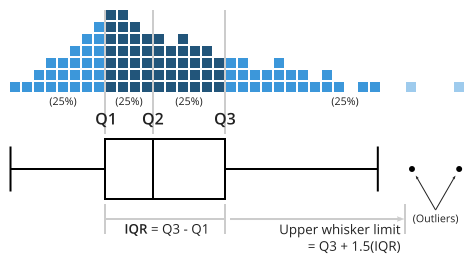


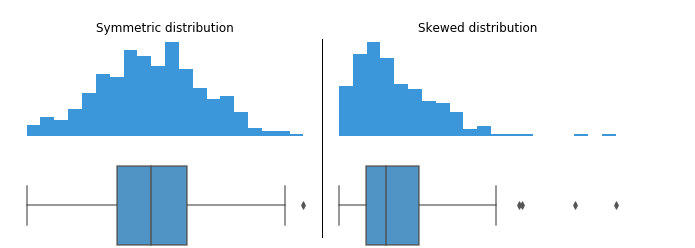

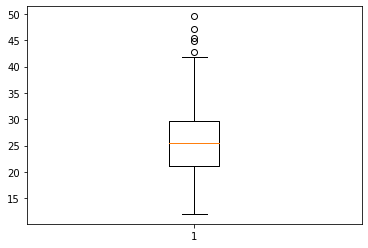

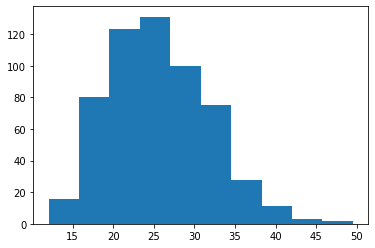

In [2]:
'''
using this example you can see that the boxplot tells that the data distribution is skewed to the left
'''
import matplotlib.pyplot as plt
import seaborn as sns

plt.boxplot(continuos_col)
plt.show()
plt.hist(continuos_col)
plt.show()

# Alternative for boxplots : Violin Plots
what is a violinplot ? 
A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable.

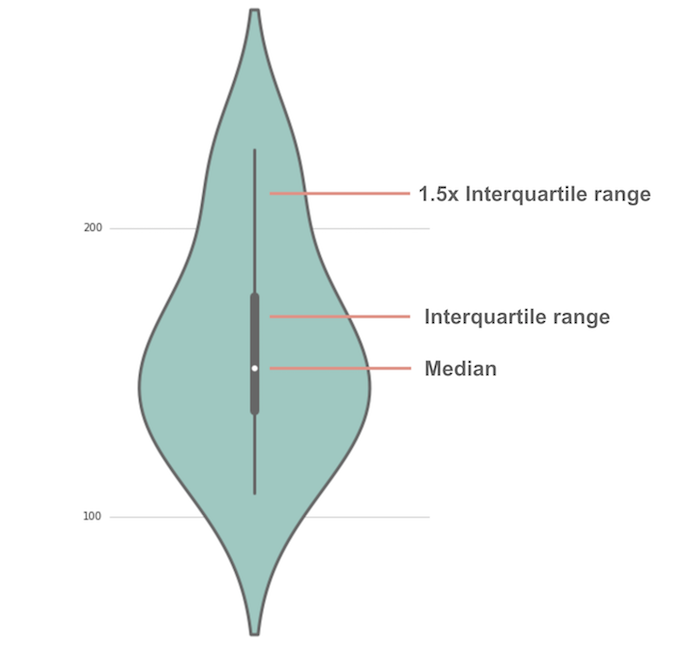

many of the same summary statistics as box plots:

the white dot represents the median

the thick gray bar in the center represents the interquartile range

the thin gray line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range.

On each side of the gray line is a kernel density estimation to show the distribution shape of the data. Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability.

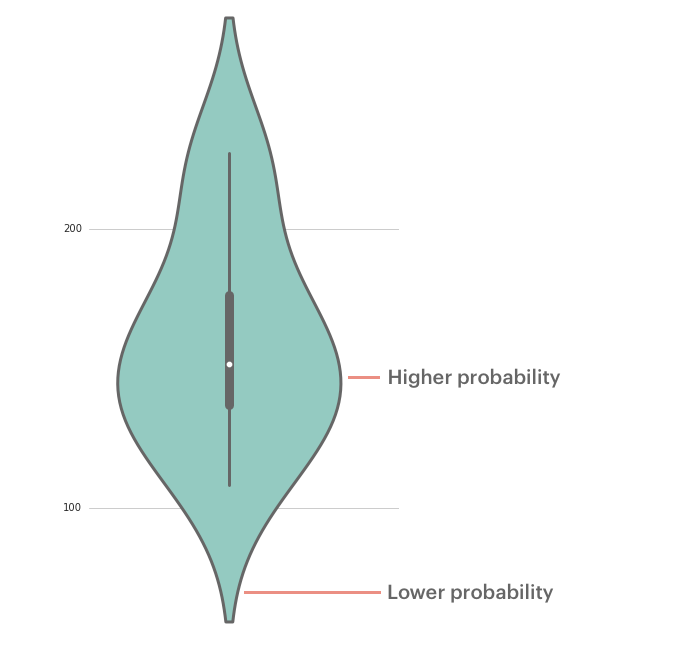

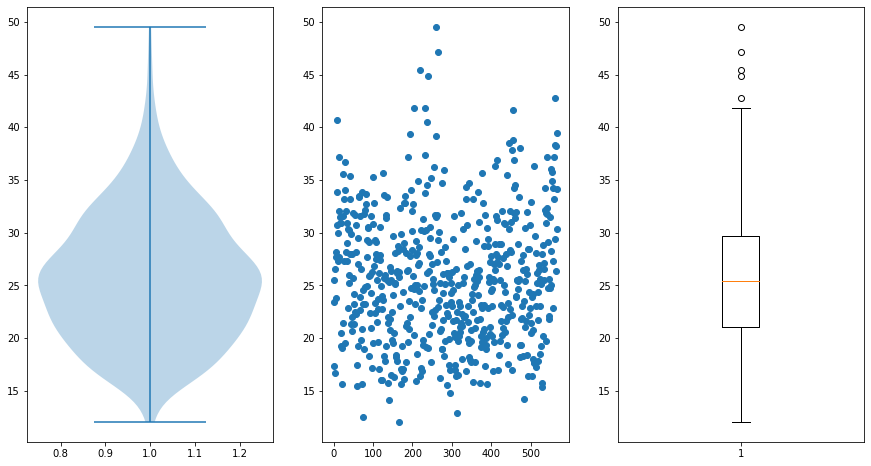

In [89]:
f, ax = plt.subplots(1, 3, figsize=(15,8))
ax[0].violinplot(continuos_col)
ax[2].boxplot(continuos_col)
ax[1].scatter(y=continuos_col , x=continuos_col.index)


### Note that density plot is just a smooth histogram "estimation of it".

C:\Users\antoz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='texture_worst', ylabel='Density'>

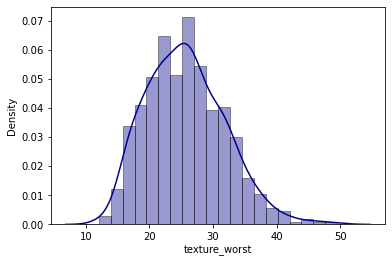

In [9]:
"""
Density Plot in seaborn can be done by the distplot function
"""
sns.distplot(continuos_col, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'}
             )

# Exploring Binary and Categorical Data


#### Mode
The most commonly occurring category or value in a data set.
#### Expected value
When the categories can be associated with a numeric value, this gives
an average value based on a category’s probability of occurrence.
#### Bar charts
The frequency or proportion for each category plotted as bars.
#### Pie charts
The frequency or proportion for each category plotted as wedges in a pie.

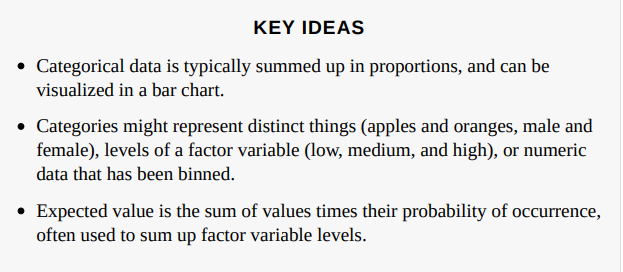
For Detailed pie charts please see https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/

you can find barchart in dataviz.

<AxesSubplot:ylabel='diagnosis'>

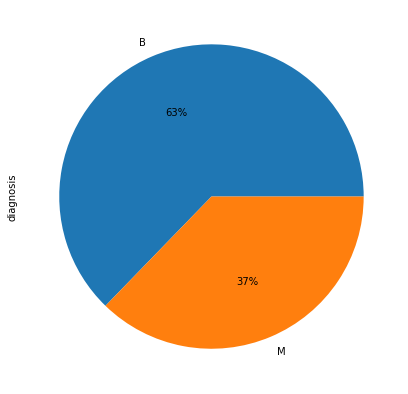

In [37]:
my_data['diagnosis'].value_counts().plot.pie(figsize=(7,7) , autopct='%1.0f%%')

<AxesSubplot:ylabel='diagnosis'>

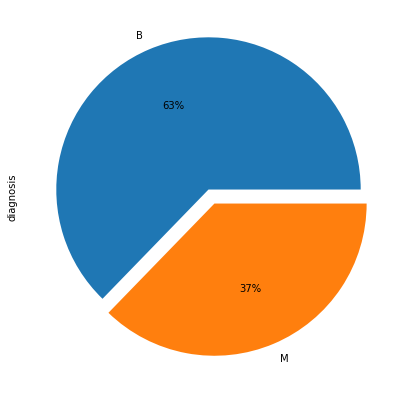

In [42]:
#You can define a gap ration
my_data['diagnosis'].value_counts().plot.pie(figsize=(7,7) , autopct='%1.0f%%' , explode=(0.05 ,0.05))

### Ways to Make a Graph Misleading
http://passyworldofmathematics.com/misleading-graphs/

1 - Vertical scale is too big or too small.

2 - Vertical axis skips numbers, or does not start at zero.

3 - Graph is not labeled properly.

4 - Graph does not have a Title to explain what it is about.

5 - Data is left out.

6 - Scale not starting at zero.

7 - Scale made in very small units to make graph look very big.

8 - Scale values or labels missing from the graph.

9 - Incorrect scale placed on the graph.

10 - Pieces of a Pie Chart are not the correct sizes.

11 - Oversized volumes of objects that are too big for the vertical scale differences they represent.

11 - Size of images used in Pictographs being different for the different categories being graphed.

12 - Graph being a non-standard size or shape.

# Correlation
Exploratory data analysis in many modeling projects (whether in data science or
in research) involves examining correlation among predictors, and between
predictors and a target variable. Variables X and Y (each with measured data) are
said to be positively correlated if high values of X go with high values of Y, and
low values of X go with low values of Y. If high values of X go with low values
of Y, and vice versa, the variables are negatively correlated.
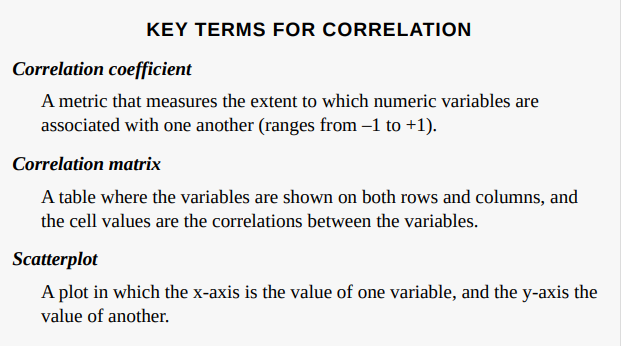

the correlation coefficient, which gives an
estimate of the correlation between two variables that always lies on the same
scale. To compute Pearson’s correlation coefficient, we multiply deviations from
the mean for variable 1 times those for variable 2, and divide by the product of
the standard deviations:
    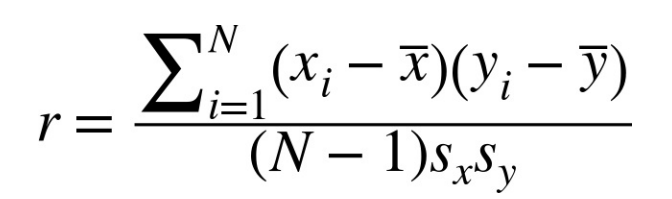

we've done Correlation matrix before in dataviz.
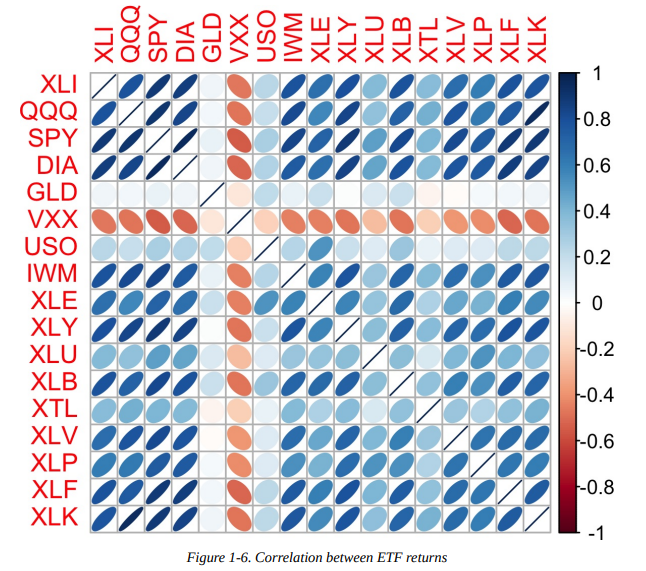
### OTHER CORRELATION ESTIMATES
Statisticians have long ago proposed other types of correlation coefficients, such as Spearman’s
rho or Kendall’s tau. These are correlation coefficients based on the rank of the data. Since
they work with ranks rather than values, these estimates are robust to outliers and can handle
certain types of nonlinearities. However, data scientists can generally stick to Pearson’s
correlation coefficient, and its robust alternatives, for exploratory analysis. The appeal of rankbased estimates is mostly for smaller data sets and specific hypothesis tests.


# Exploring Two or More Variables


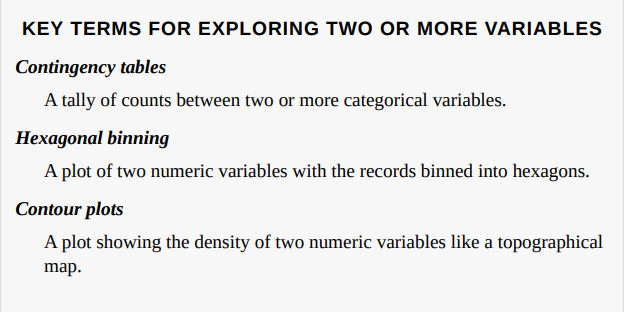